# Ejercicios OpenSource con sklearn.datasets

---



##Regresión lineal al dataset  load_boston


###Librerías necesarias

In [ ]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)
import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

### cargamos los datos de la biblioteca scikit-learn

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

###Conociendo los datos que tiene el dataset

In [ ]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


*   datos/data: contiene la información de varias casas
*   feature_names: nombres de las características
*   DESCR: describe el conjunto de datos
*   **objetivo/target: los precios de la casa (caracterista más relevante)**
---


Conociendo las caracteristicas que tienen los datos:

In [ ]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

*   CRIM: Tasa de delincuencia per cápita por ciudad
*   ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
*   INDUS: Proporción de acres comerciales no minoristas por ciudad
*   CHAS: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
*   NOX: concentración de óxido nítrico (partes por 10 millones)
*   RM: Número medio de habitaciones por vivienda
*   EDAD: Proporción de unidades ocupadas por el propietario construidas antes de 1940
*   DIS: distancias ponderadas a cinco centros de empleo de Boston
*   RAD: Índice de accesibilidad a carreteras radiales
*   TAX/IMPUESTO: Tasa de impuesto a la propiedad de valor total por USD 10.000
*   PTRATIO: Proporción alumno/profesor por municipio
*   B: 1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
*   LSTAT: porcentaje de la población de menor estatus
*   MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 (REVISAR)


### Creamos una tabla de datos usando **pandas** 
(facilita el manejo de los datos)


In [ ]:
#creamos una tabla (tipo excel con PANDAS, con titulos para faciliar la manipulación)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(10)   #imprimimos las primeras 10 filas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Podemos ver que el valor de destino falta en los datos. 
Creamos una nueva columna de valores de destino y la agregamos a la tabla la llamamos **MEDV**

In [ ]:
#Agregamos en la tabla los valores de target del dataset
boston['MEDV'] = boston_dataset.target
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


###Conociendo los datos

In [ ]:
#Cuantos registros tiene el dataset (rows)
#boston.shape[1]
#boston.index
#Cuántos datos tiene cada registro (columns)
#boston.shape[1]
#Hay datos nulos (null) en el dataset?
boston.isnull().sum()
#boston.isnull().values.any()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###Graficando los valores
reviseos la estimación de la densidad del kernel de los valores de las casas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


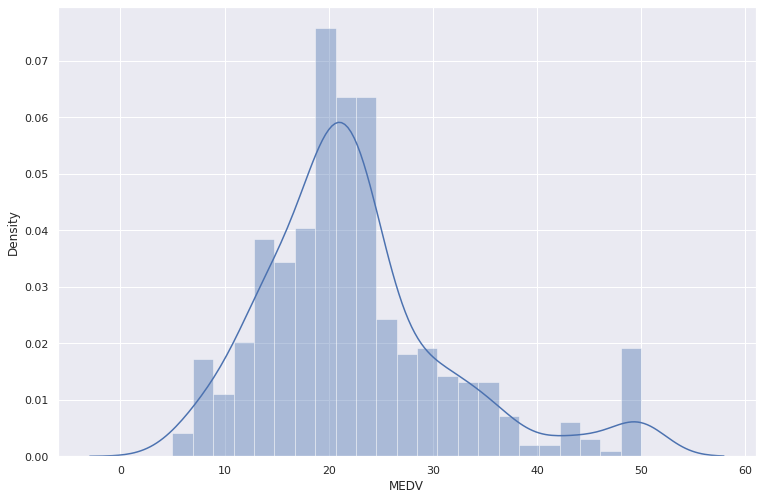

In [ ]:
sns.set(rc={'figure.figsize':(12.5,8.27)})  #tamaño del grafico
sns.distplot(boston['MEDV'])                #agregamos los datos
plt.show()                                  #visualizamos el grafico

###matriz de correlación 
para medir las relaciones lineales entre las variables y de esa forma determinar que valores son más practicos para entregar un modelo de regresión lineal.

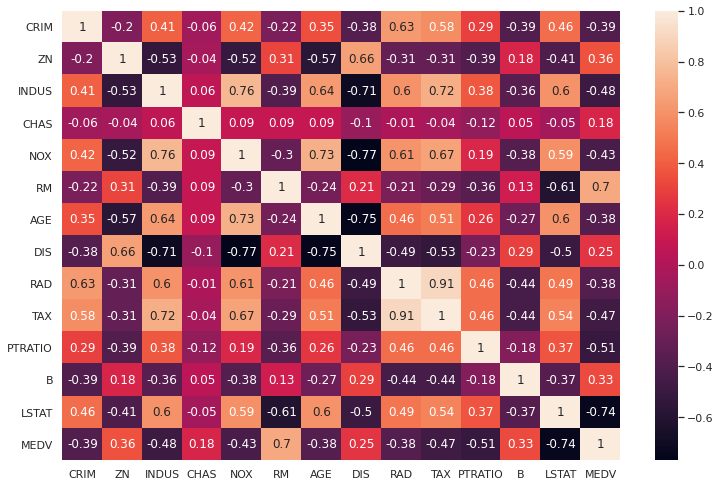

In [12]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = boston.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)


Se deben seleccionar aquellas características que tienen una alta correlación (ya se positiva o negativa) con nuestra variable de destino (MEDV). 

Entre 0.7 a 0.74 sea positivo o negativo:
MEDV 	<->	RM
MEDV	<->	LSTAT
Se deben descartar las características que tengan multi-colinealidad (correlación utópica que solo se podría dar en laboratorio), son aquellas que tengan valores superiores 0,74:
RAD<->TAX 
DIS<->AGE

Usaremos un gráfico de dispersión para ver cómo estas características varían 

RM vs MEDV
LSTAT vs MEDV


### Graficando variables descartadas


si no creemos en tablas, pues generemos graficas de comparación entre variables y a ojo descartamos

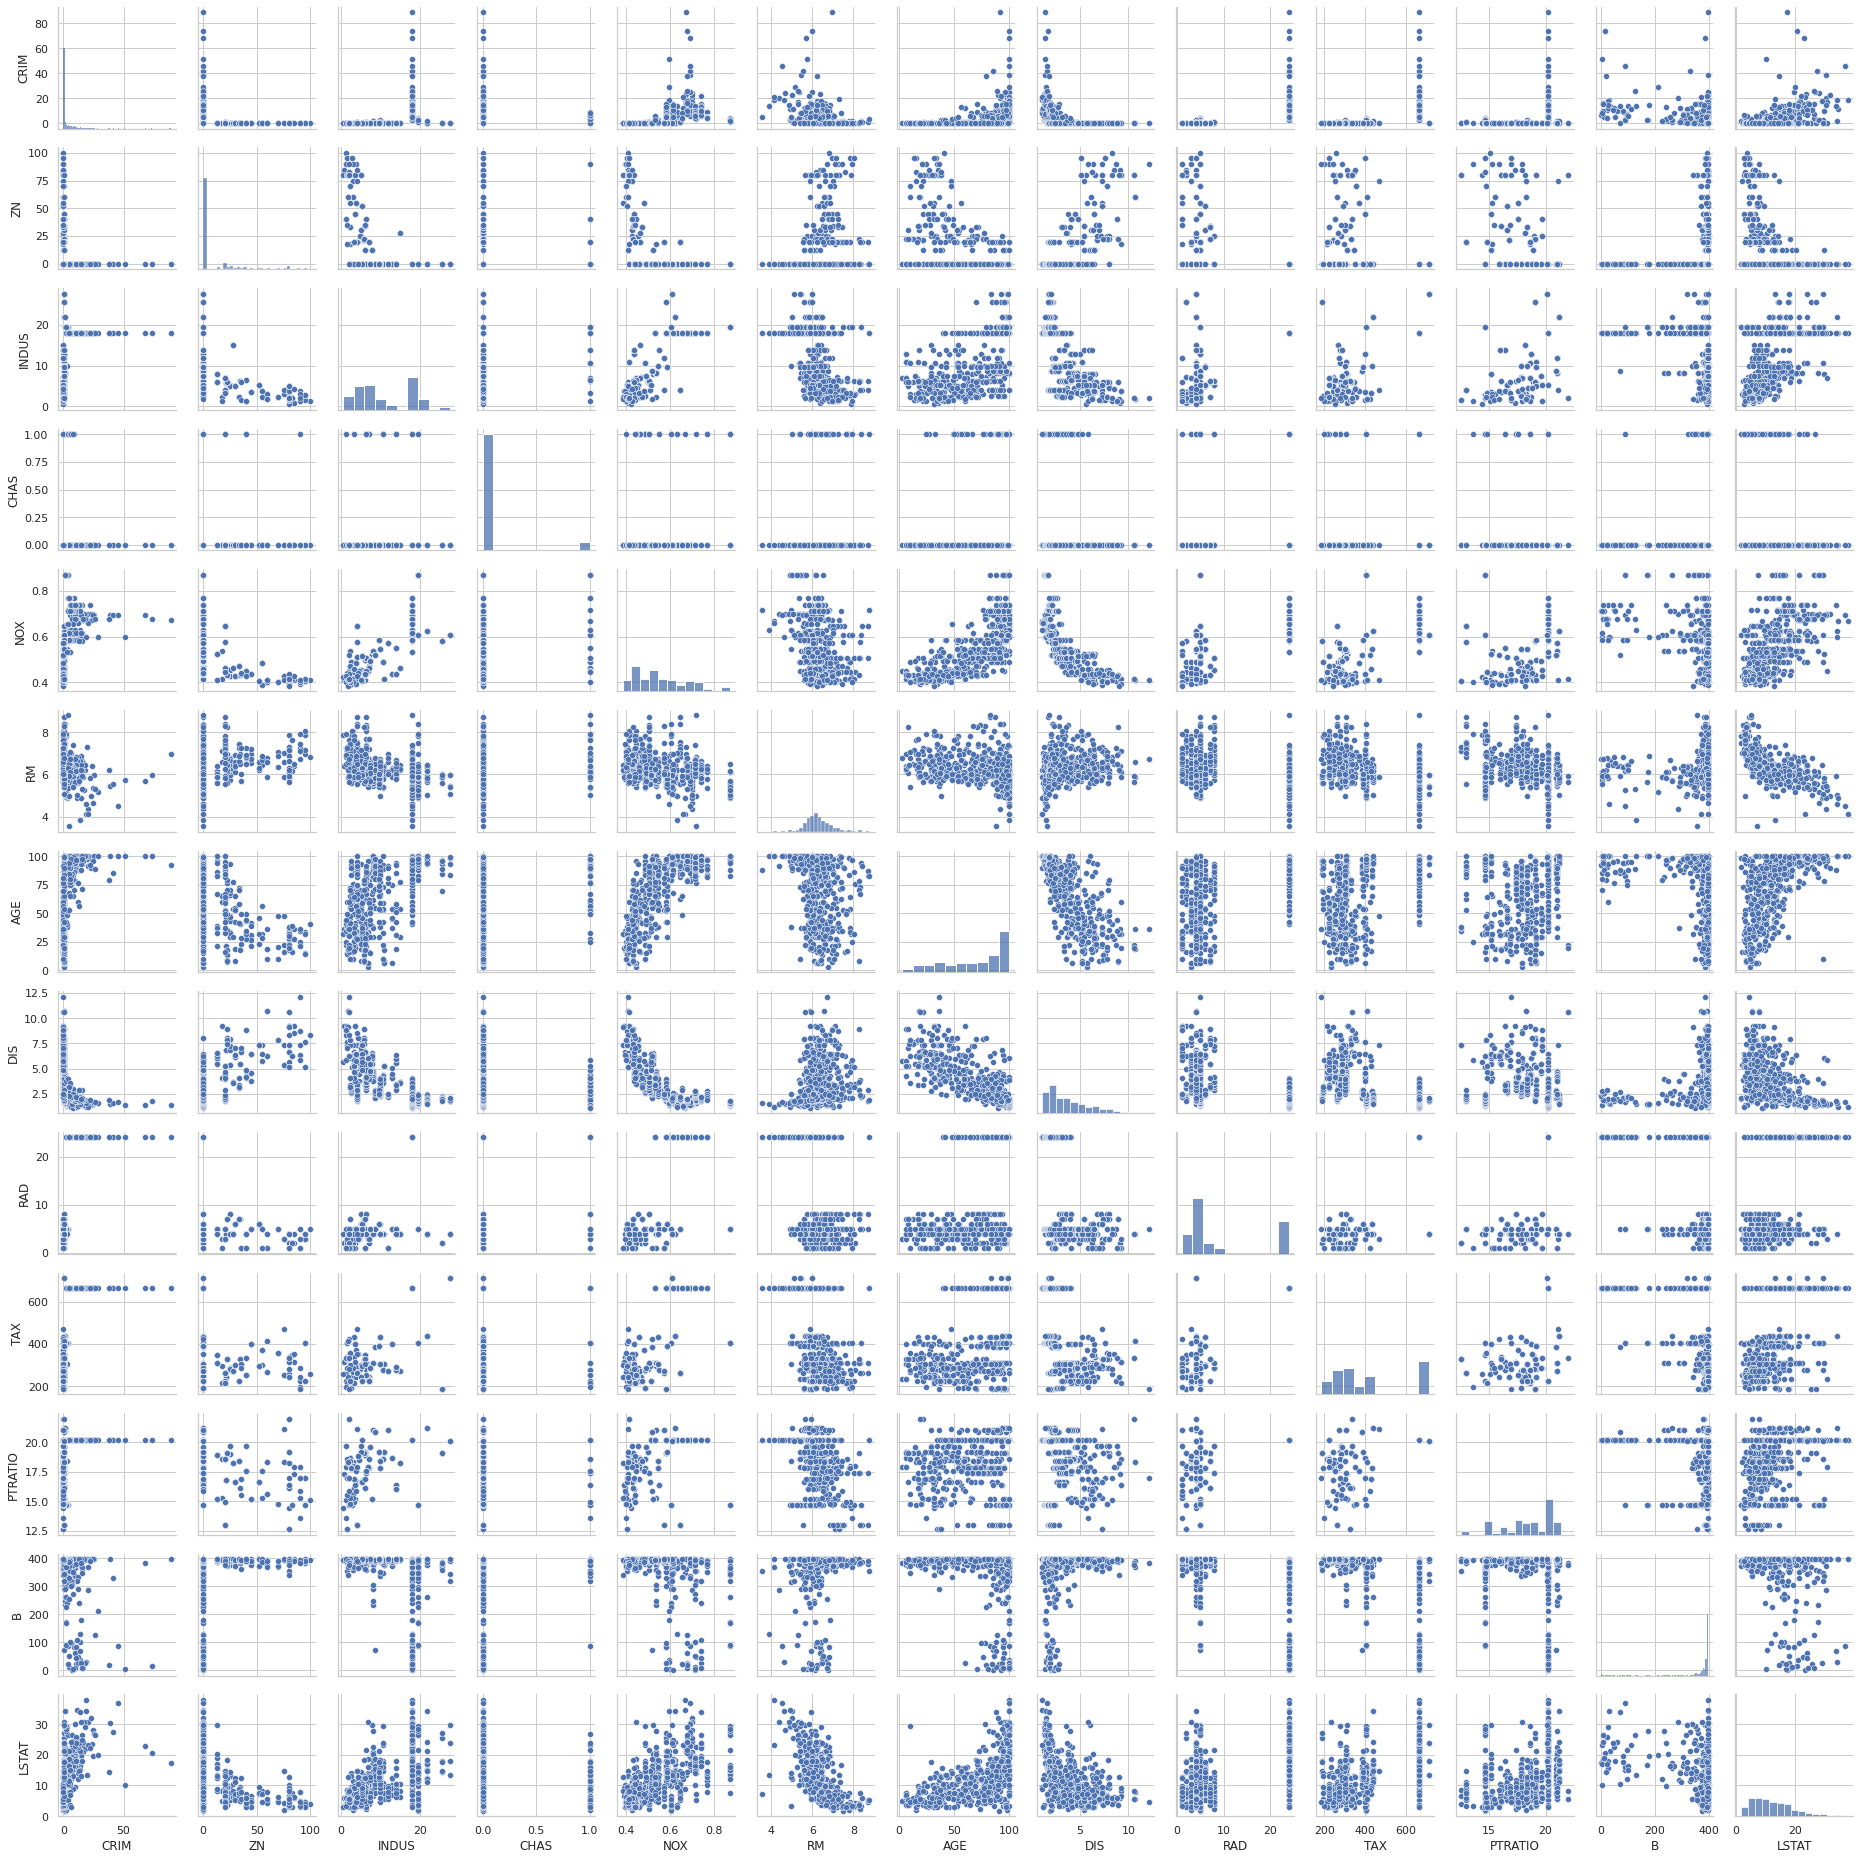

In [13]:
sns.set(style='whitegrid', context='notebook')
features_plot = boston_dataset.feature_names
sns.pairplot(boston[features_plot], height=2.0);
plt.tight_layout()
plt.show()

#### descartando RAD vs TAX 


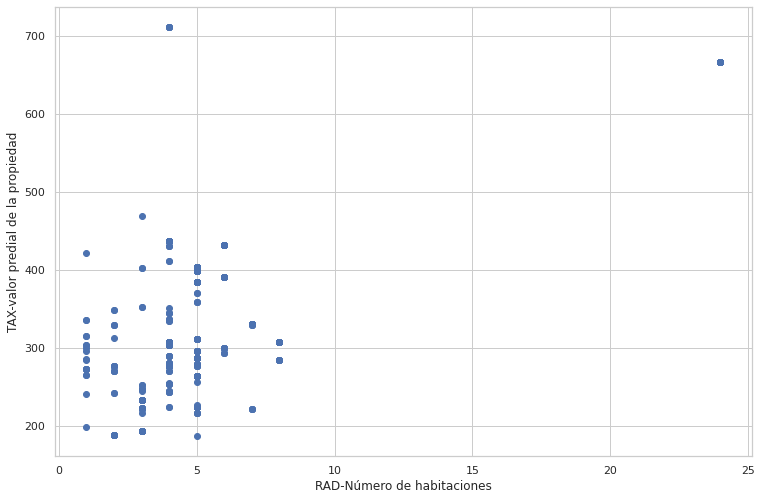

In [14]:
X = boston['RAD']
y = boston['TAX']
plt.scatter(X, y)
plt.xlabel('RAD-Número de habitaciones')
plt.ylabel('TAX-valor predial de la propiedad')
plt.show()

####descartando DIS vs AGE

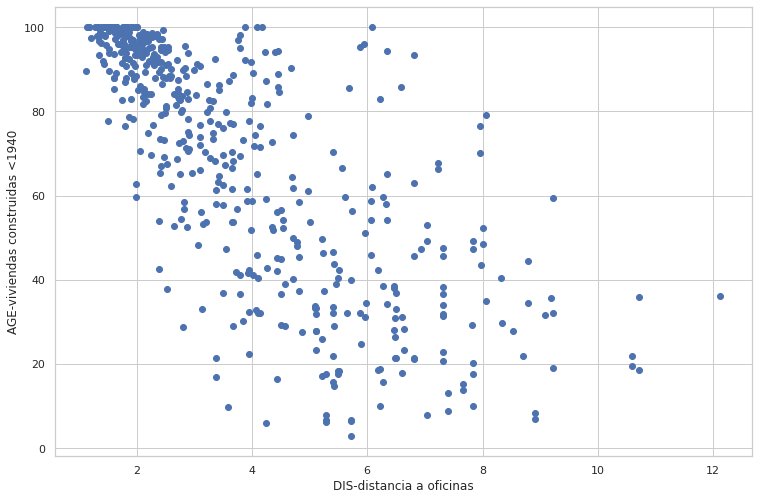

In [15]:
X = boston['DIS']
y = boston['AGE']
plt.scatter(X, y)
plt.xlabel('DIS-distancia a oficinas')
plt.ylabel('AGE-viviendas construidas <1940')
plt.show()

###Graficando variables seleccionadas

#### MEDV vs RM

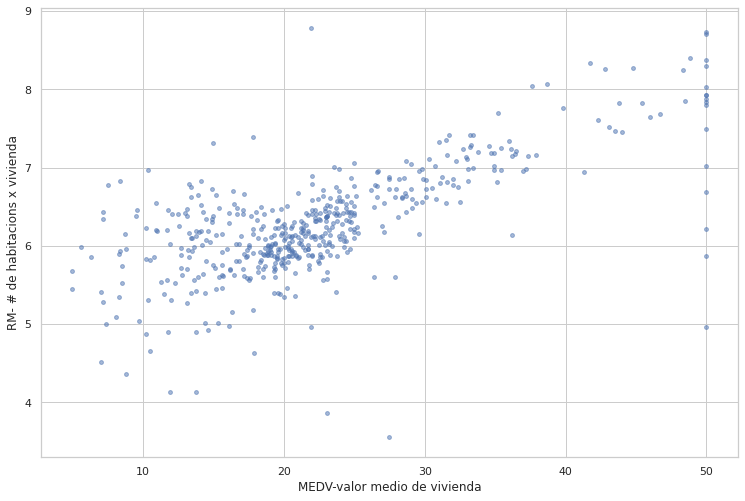

In [16]:
X = boston['MEDV']
y = boston['RM']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('RM- # de habitacions x vivienda')
plt.show()

####LSTAT vs MEDV


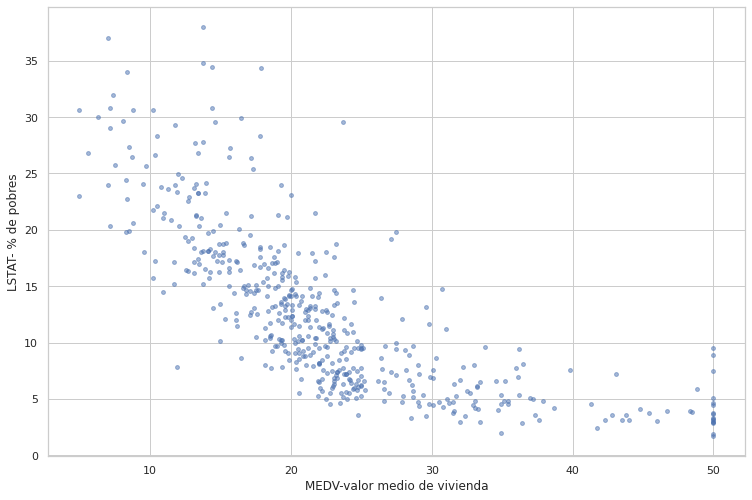

In [17]:
X = boston['MEDV']
y = boston['LSTAT']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('LSTAT- % de pobres')
plt.show()

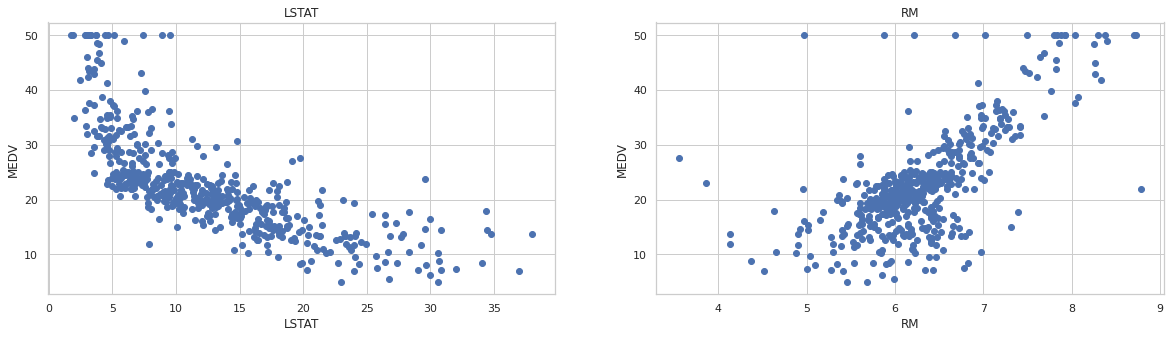

In [18]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### 8. Preparación de los datos para el entrenamiento del modelo

Regresión lineal:


> Y = mX + b


Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el “punto de corte con el eje Y” en la gráfica (cuando X=0)
> Concatenamos las columnas que seleccionamos para entrenar:
X = LSTAT y RM
Y = MEDV



In [222]:
#Entrenando con una sola variable en X

#X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
#X = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])

#entrenando con dos variables en X
#X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
#Y = boston['MEDV']

#Entrenando con solo una variable en x

#Entrenando con TAX y CRIM
X = pd.DataFrame(np.c_[boston['RM']], columns=['RM'])

#Entrenando con MEDV -> PRECIO

Y = boston['MEDV']

### 9. Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state=30)
print("x90%: "+str(X_train.shape) +", x10%: "+str(X_test.shape))
print("y90%: "+str(Y_train.shape) +", y10%: "+str(Y_test.shape))

#print("x70%: "+str(X_train.shape) +", x30%: "+str(X_test.shape))
#print("y70%: "+str(Y_train.shape) +", y30%: "+str(Y_test.shape))

#print("x75%: "+str(X_train.shape) +", x25%: "+str(X_test.shape))
#print("y75%: "+str(Y_train.shape) +", y25%: "+str(Y_test.shape))


x90%: (328, 1), x10%: (178, 1)
y90%: (328,), y10%: (178,)


###10.entrenando un modelo de regresión lineal


In [224]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 11.Evaluación del modelo
Evaluamos el modelo utilizando RMSE y R2-score.


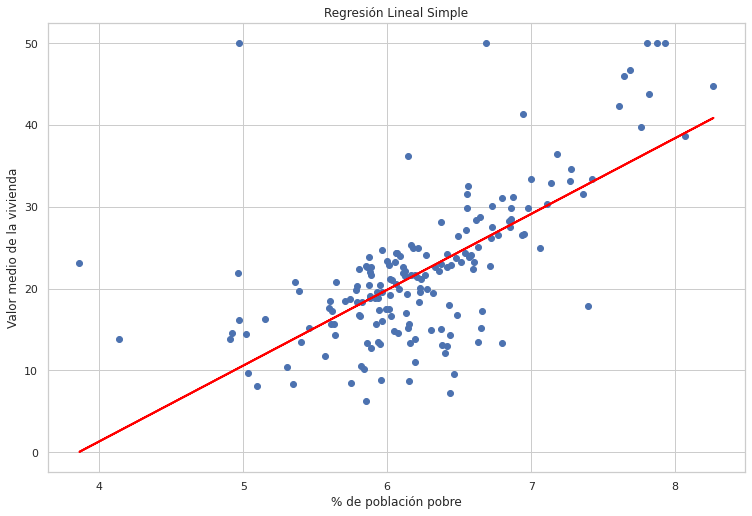


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.5096667729203108


In [225]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['RM'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))


#PREGUNTAR SOBRE FUNCIONES !!!


In [226]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))


#PREGUNTAR SOBRE COMO SE EVALUA EL MODELO

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 6.4857295346490655
R2 resultado es 0.5096667729203108


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 6.817571259800931
R2 resultado es 0.43164769887877485


##Regresión lineal entrenando con todas las caracteristicas
funcionara?

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
boston_data = datasets.load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


compararmos variables unas con otras y a ojo descartamos o no?

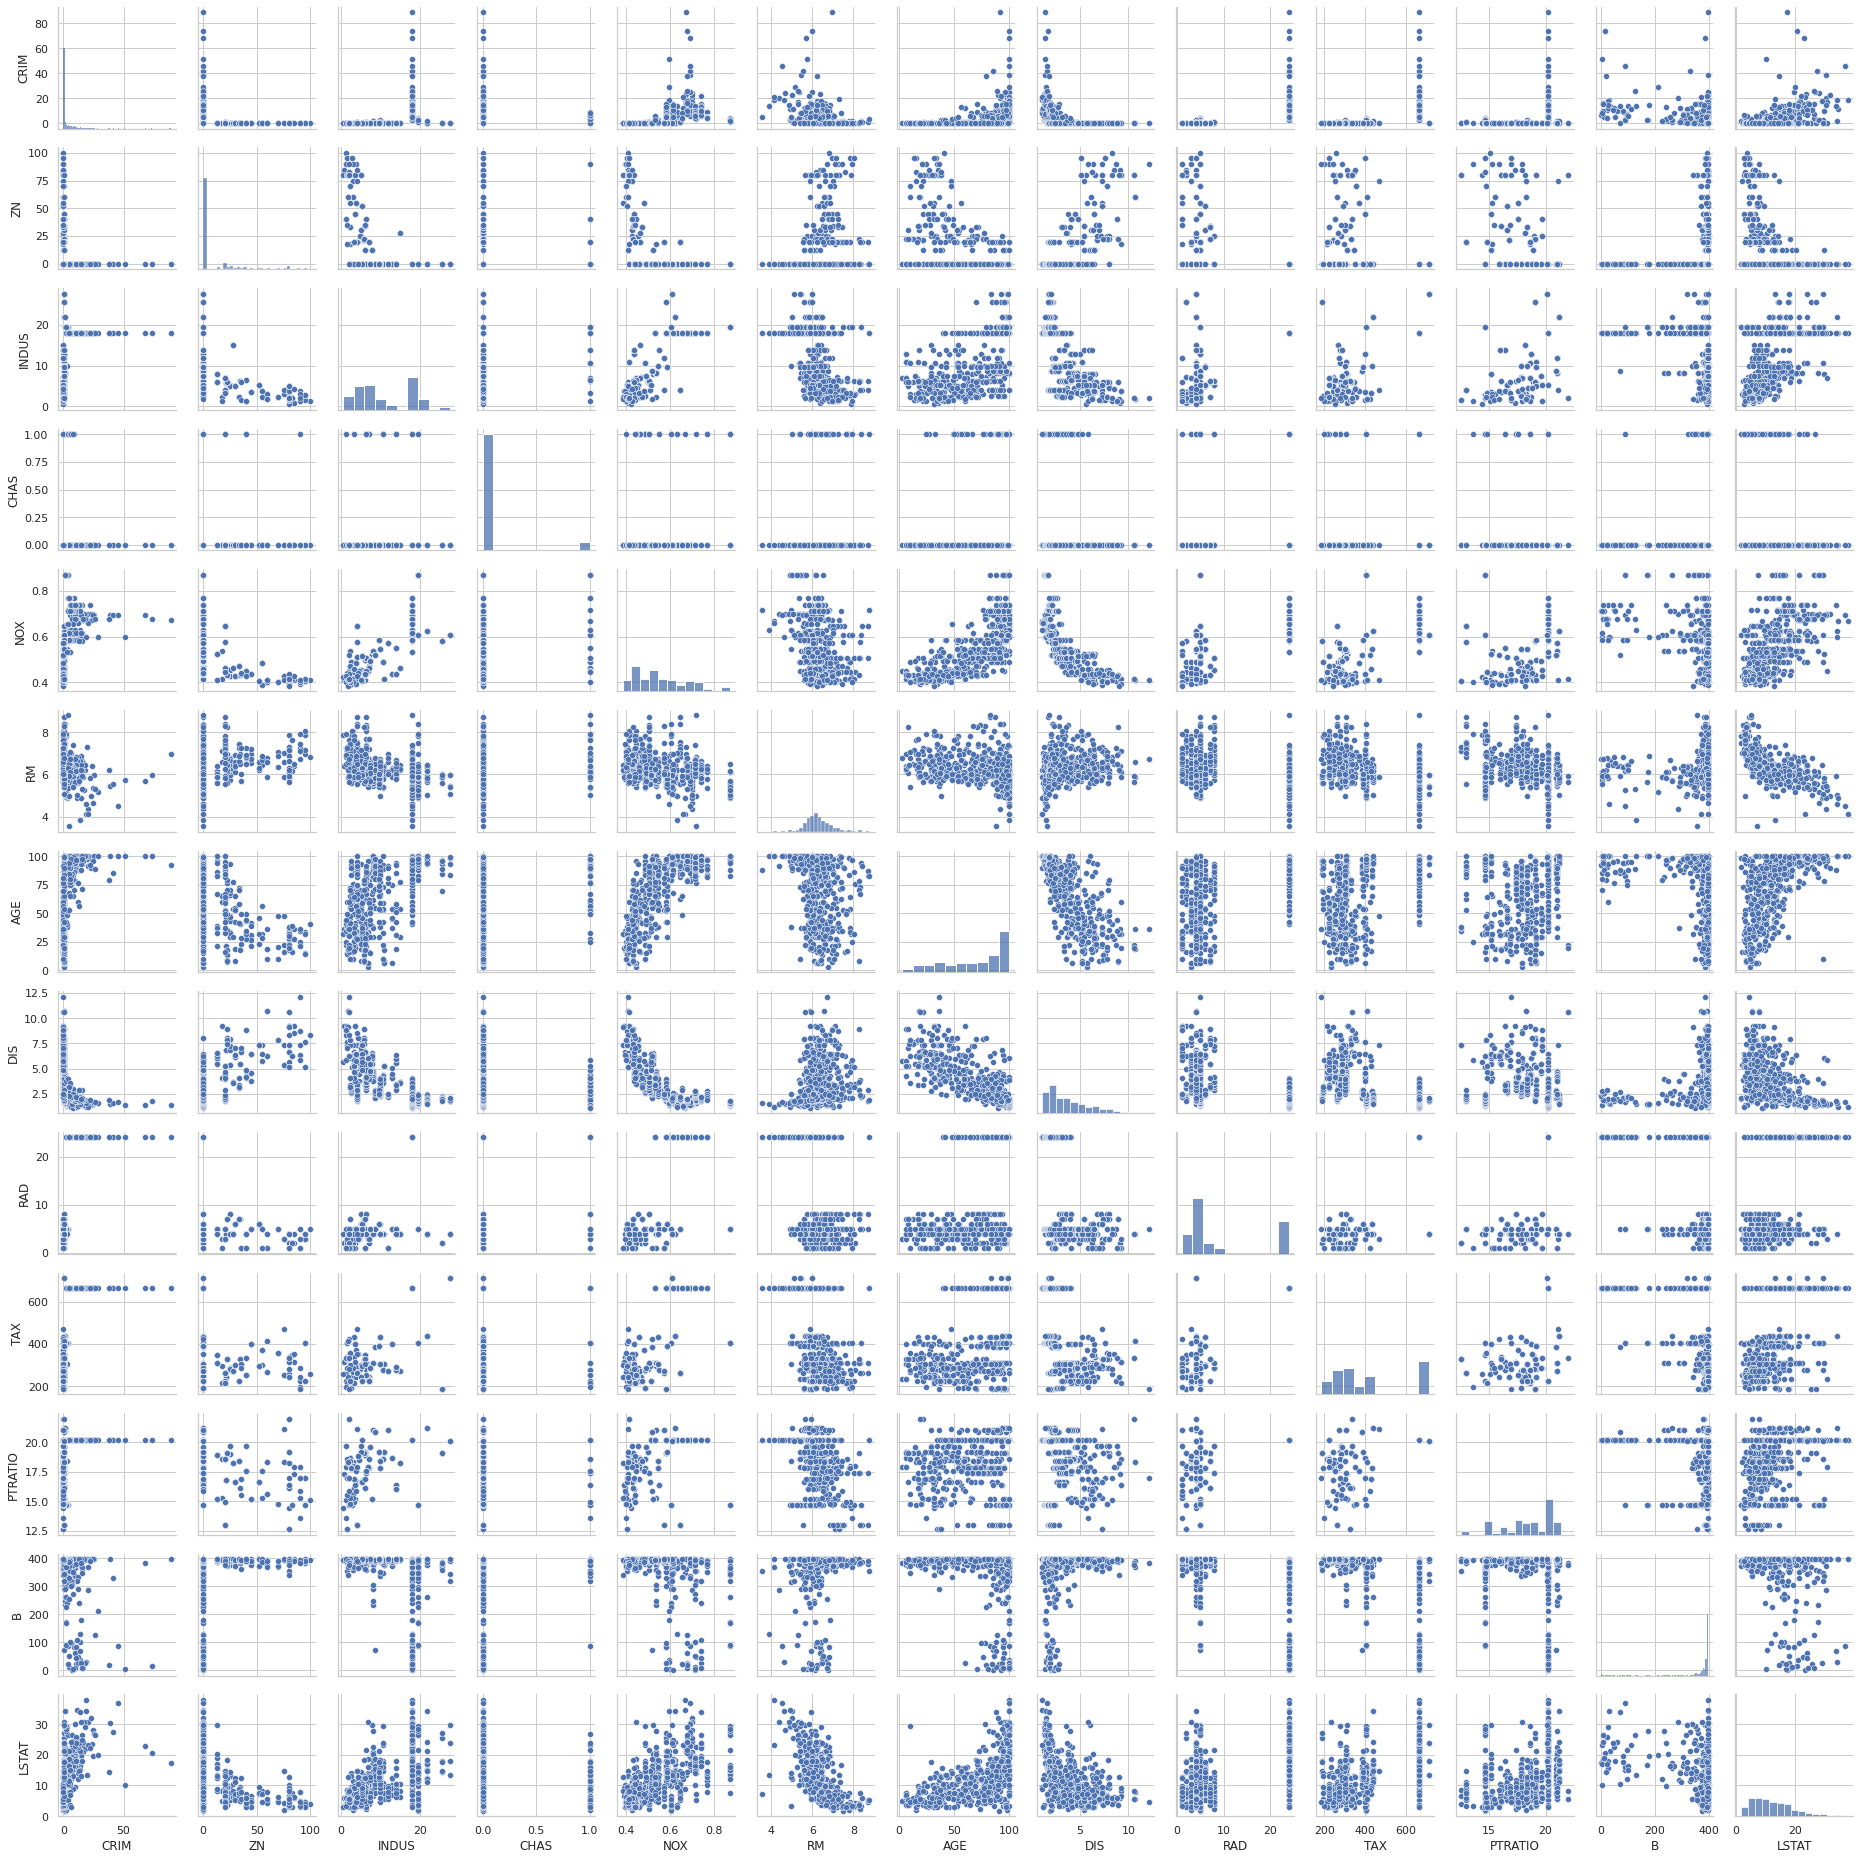

In [228]:
#---visualización de los datos con graficos estadisticos--
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
features_plot = boston_data.feature_names
sns.pairplot(boston_df[features_plot], height=2.0);
plt.tight_layout()
plt.show()

###Separar los datos (TRAIN, TEST)

In [229]:
scalar = StandardScaler()
y = boston_data.target        
X = boston_df.values             #tomaremos todos los columnas para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("TRAIN--> X: {} - Y: {}".format(X_train.shape,y_train.shape))
print("TEST--> X: {} - Y: {}".format(X_test.shape,y_test.shape))

TRAIN--> X: (404, 13) - Y: (404,)
TEST--> X: (102, 13) - Y: (102,)


###Aplicar regressión lineal

In [220]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#entrenamos
regressor.fit(X_train, y_train)
#predecimos
pred = regressor.predict(X_test)

visualizar la regresión

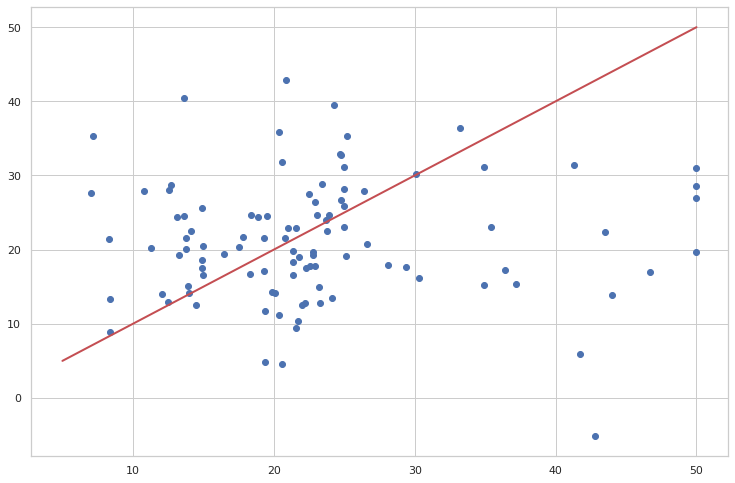

Precisión del modelo: 0.8016448703738089


In [230]:
#visualizar la predicción en los datos de testeo
plt.scatter(y_test, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()
print("Precisión del modelo: "+str(regressor.score(X_test, y_test)))

### UNA PRECISIÓN DEL 71% 